## import

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sma
from scipy import stats
from sklearn.linear_model import LinearRegression

## 学習データを準備する

In [2]:
df = sns.load_dataset('diamonds')
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
X = df['depth'].values
y = df['price'].values
X = X.reshape(-1, 1)

## 学習する

In [3]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# 切片：intercept_
# 傾き：coef_
print(model.coef_, model.intercept_)

[-29.86685265] 5775.256869212748


##  係数のp値を計算してみる

In [5]:
# 線形回帰のパラメータθ,切片の係数1を含めた行列X_
X_ = np.append(np.ones((len(X),1)), X, axis=1)
# モデルの係数
theta = np.append(model.intercept_, model.coef_)
# 予測値y_preds
y_preds = model.predict(X)

## スクラッチでp値を計算

In [6]:
RSS = np.sum((y-y_preds)**2)
RSE = np.sqrt(RSS / (len(X_) - len(X_[0])))
SE_sq = RSE**2 * np.linalg.inv(np.dot(X_.T, X_)).diagonal()

In [7]:
t = theta / np.sqrt(SE_sq)
print(t)

[ 7.79972831 -2.4914259 ]


In [8]:
p = [2*(1-stats.t.cdf(np.abs(t_val),(len(X_)-len(X_[0])))) for t_val in t]
print(p)
# θ1に対するp値が5%以下で棄却されるため,θ1がが0であるという帰無仮説は棄却される

[6.439293542825908e-15, 0.012726132302040893]


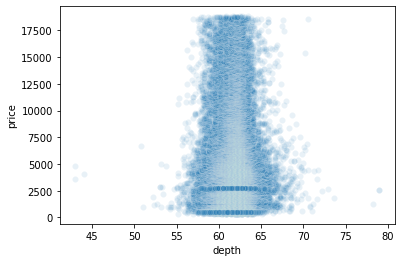

In [9]:
sns.scatterplot(x=df['depth'], y=df['price'], alpha=0.1)

## statsmodelsを使って一発でp値を確認する

In [25]:
# depthのp値
# 切片の係数を追加
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 5.505e+04
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:17:52   Log-Likelihood:            -4.7061e+05
No. Observations:               53920   AIC:                         9.412e+05
Df Residuals:                   53913   BIC:                         9.413e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e+04    456.639     46.682      0.0

In [24]:
# 全ての特徴量のp値
X = df[['carat','depth','table','x', 'y', 'z']].values
# 切片の係数を追加
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 5.505e+04
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:17:48   Log-Likelihood:            -4.7061e+05
No. Observations:               53920   AIC:                         9.412e+05
Df Residuals:                   53913   BIC:                         9.413e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e+04    456.639     46.682      0.0